# zfitter
zfit wrapper for lazy analysits [GitHub](https://github.com/mzks/zfitter)

Author: Keita Mizukoshi (Kobe Univ. mzks@stu.kobe-u.ac.jp, @mzks)

## Concept

 - Easy and less-typing
 - Visualization
 
[`zfit`](https://github.com/zfit/zfit) is a nice fitting tools on python, built on object-oriented interface.
However, I would sometime like to fit easily. I do *not always* want to care minimizers and cost function.
I usually take an approach for good fitting, try-error-retry with visual environment.
For that purpose, raw `zfit` is slightly much.
To prevent tenosynovitis of lazy analysts, I made a wrapper of `zfit`, `zfitter`

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# generate sample data
data = np.random.normal(11, 4, 10000)

### Make 1-d histogram of data

In [4]:
from zfitter import zfitter
zf = zfitter(data)

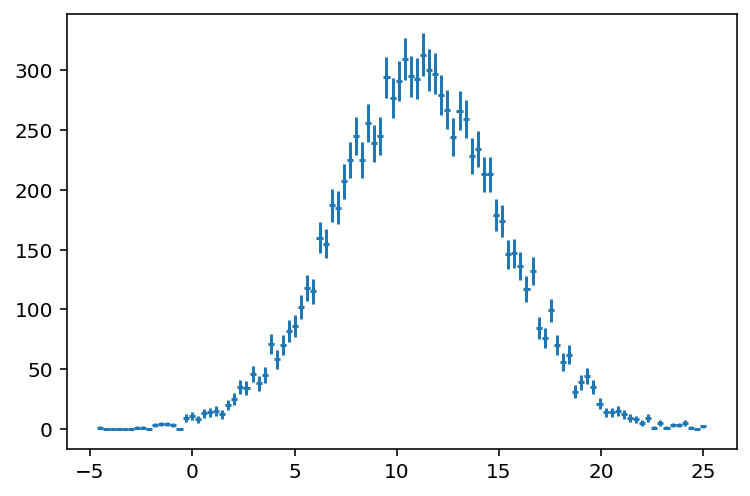

In [5]:
# If you want, number of bins and ranges can be set.
#zf.set_bins(200) # Number of bins
#zf.set_data_range(0, 25) # Range for data
#zf.set_range(5, 15) # Range for fitting

# Let's visualize! zfitter always provides `draw()` to visualize even before definition of model.
zf.draw()

### Model

In [6]:
zf.set_model('gauss') 
# I would like to use gaussian.
# This is a str-style to set model.
# It will support for other style (Object, str+str, ...), user will be able to find their model freely.
# User defined model with python function has been inplemented.

# By the way,... which parameters can be used? This method prints parameter list.

Parameters
mu : 0.0
sigma : 1.0


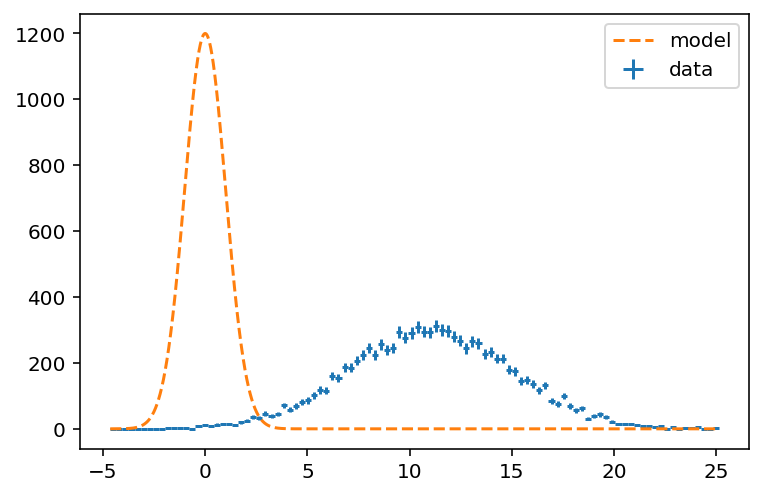

In [8]:
# Before fitting
zf.draw(); # Always can be used!
plt.legend()
# Even before fitting, analysts would like to draw data and model to find good model and initial parameters.

The initial valeues of the model is not good.
Set better values manually and re-draw.

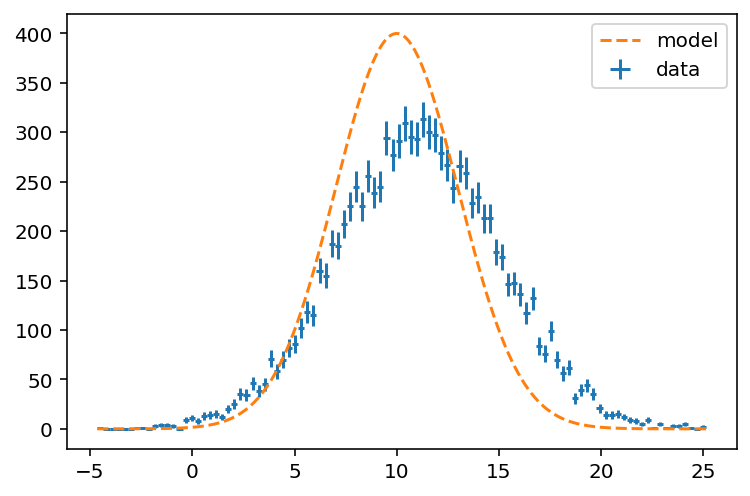

In [9]:
# In the real situation, this statements are written in the upper column, and run many times.
zf.set_parameter('mu', 10)
zf.set_parameter('sigma', 3)
zf.draw()
plt.legend()

# Issue: zfit doesn't provide way to overload Parameters themselves.
# The current zfitter doesn't support to set lower and upper limit, and step_size.

This is not perfect, but it is enough to fit. The rest work is fitter's one.
If you don't like the initial values, you can go back and re-set parameters.

In [11]:
zf.fit()

FitResult of
<UnbinnedNLL model=[<zfit.Gauss  params=[mu, sigma] dtype=float64>0] data=[<zfit.core.data.Data object at 0x14d7e0350>] constraints=[]> 
with
<Adam strategy=PushbackStrategy tolerance=1e-05>

╒═════════╤═════════════╤══════════════════╤═══════╤════════════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value          │
╞═════════╪═════════════╪══════════════════╪═══════╪════════════════════╡
│ True    │ True        │ False            │ -999  │ 28038.008894920757 │
╘═════════╧═════════════╧══════════════════╧═══════╧════════════════════╛

Parameters
name      value    at limit
------  -------  ----------
mu           11       False
sigma     4.002       False

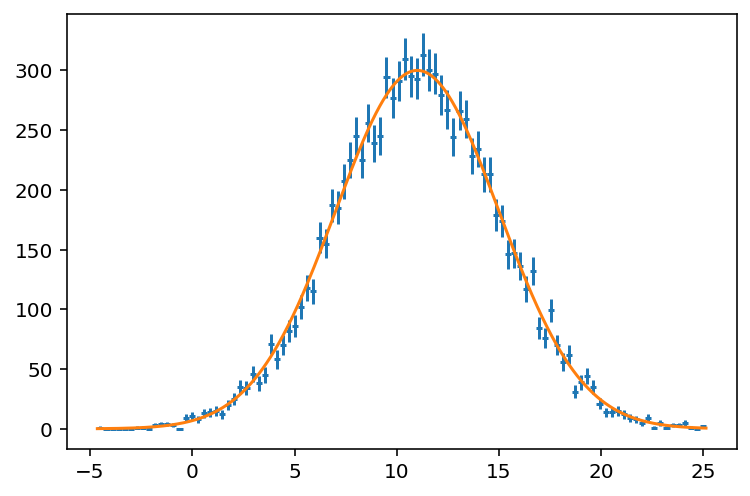

In [12]:
zf.draw()

It looks nice.

## User model

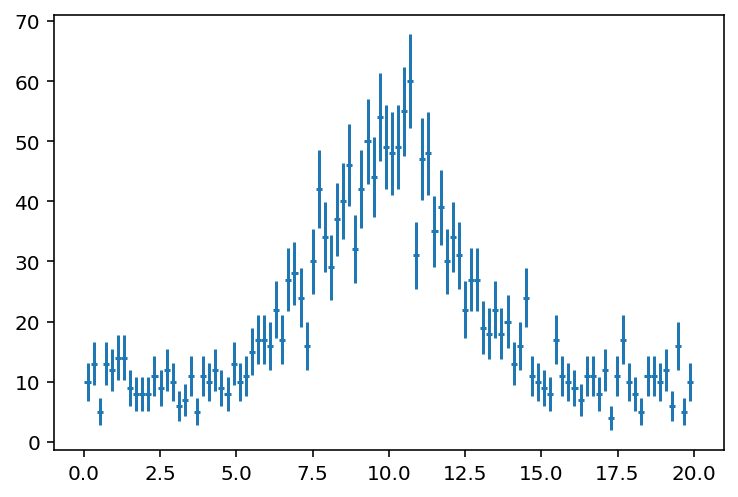

In [13]:
# Data is not on simple gaussian
signal = np.random.normal(10, 2, 1000)
background = np.random.uniform(0, 20, 1000)
data = np.concatenate([signal, background])
zf2 = zfitter(data)
zf2.draw()

In [14]:
# User model as python function
from zfit import z
def user_func(x, mu=10, sigma=3, C=1): # These default arguments are used as initial parameters
    return z.exp(-z.square((x - mu) / sigma)) + C

zf2.set_model_func(user_func) # Only things user have to do is passing the function

Parameters
C : 1.0
mu : 10.0
sigma : 3.0


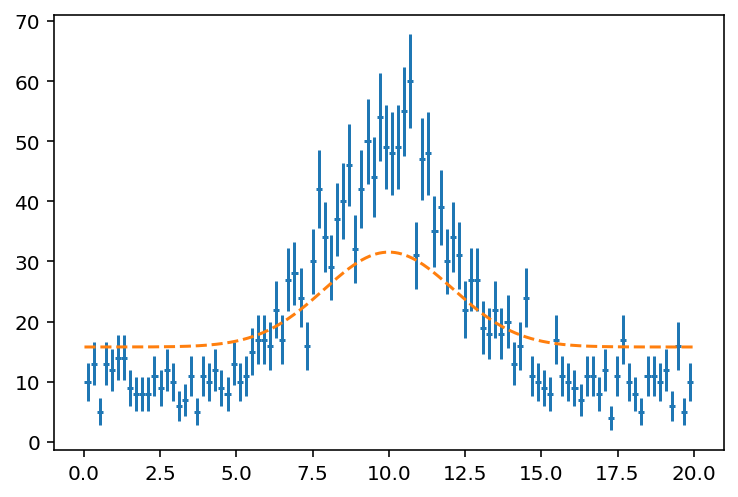

In [15]:
zf2.draw()

/Users/mzks/zfit_test/zfit/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


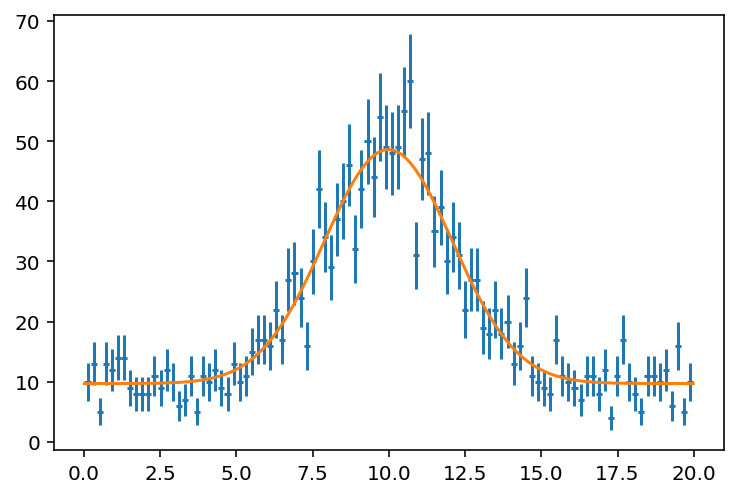

In [17]:
zf2.fit()
zf2.draw()

In [18]:
zf2.result

FitResult of
<UnbinnedNLL model=[<zfit.UserPDF  params=[C, mu, sigma] dtype=float64>0] data=[<zfit.core.data.Data object at 0x14de385d0>] constraints=[]> 
with
<Adam strategy=PushbackStrategy tolerance=1e-05>

╒═════════╤═════════════╤══════════════════╤═══════╤═══════════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value         │
╞═════════╪═════════════╪══════════════════╪═══════╪═══════════════════╡
│ True    │ True        │ False            │ -999  │ 5592.524585508234 │
╘═════════╧═════════════╧══════════════════╧═══════╧═══════════════════╛

Parameters
name      value    at limit
------  -------  ----------
C        0.2493       False
mu        9.986       False
sigma     2.975       False